# Quick Analysis #
* <h3>Data Visualization Using Pandas Plot Methods</h3>
* <h3>Predicting Number of Languages Using Regression / Regression Trees</h3>
    We get a relatively good fit for a selfcontained regression tree showing 2 major drivers:  
    * Page Views: The higher page views is, the more languages for the article.
    * Years Since Birth: If Page Views > 17m, then the more years since birth, the more languages for the article.

# Import Data

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('bmh') # Select bmh Plotting Style
plt.rcParams['figure.figsize'] = (11.0, 9.0)
cm = plt.cm.get_cmap('RdYlBu')

C:\Users\dell\AppData\Local\Temp\ipykernel_6796\191312393.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


In [23]:
df = pd.read_csv(r"C:\Users\dell\Downloads\database.csv\database.csv")
df.head()

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


### Create New Variable: "Years Since Birth" (from 2018)

In [24]:
df.loc[df.birth_year == '530s','birth_year'] = 530
df.loc[df.birth_year == '1237?','birth_year'] = 1237
df.birth_year.replace("Unknown",'',inplace=True)
df['years_since_birth'] = (2018 - pd.to_numeric(df.birth_year))

# Data Visualization

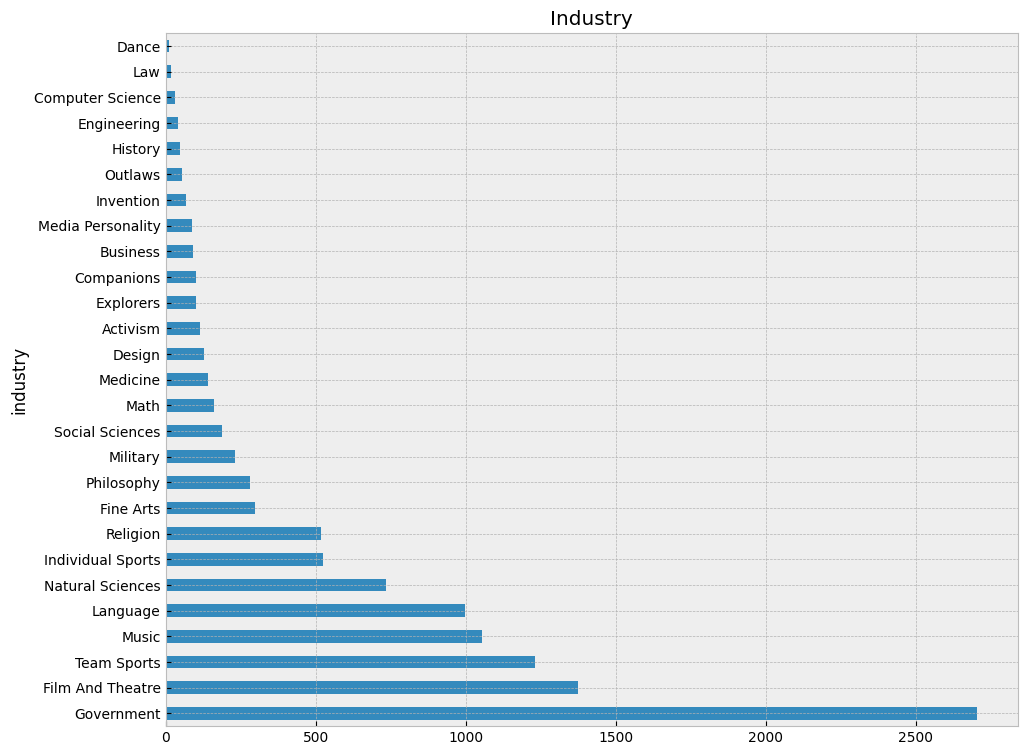

In [25]:
_ = df.industry.value_counts().plot(kind='barh',title='Industry')

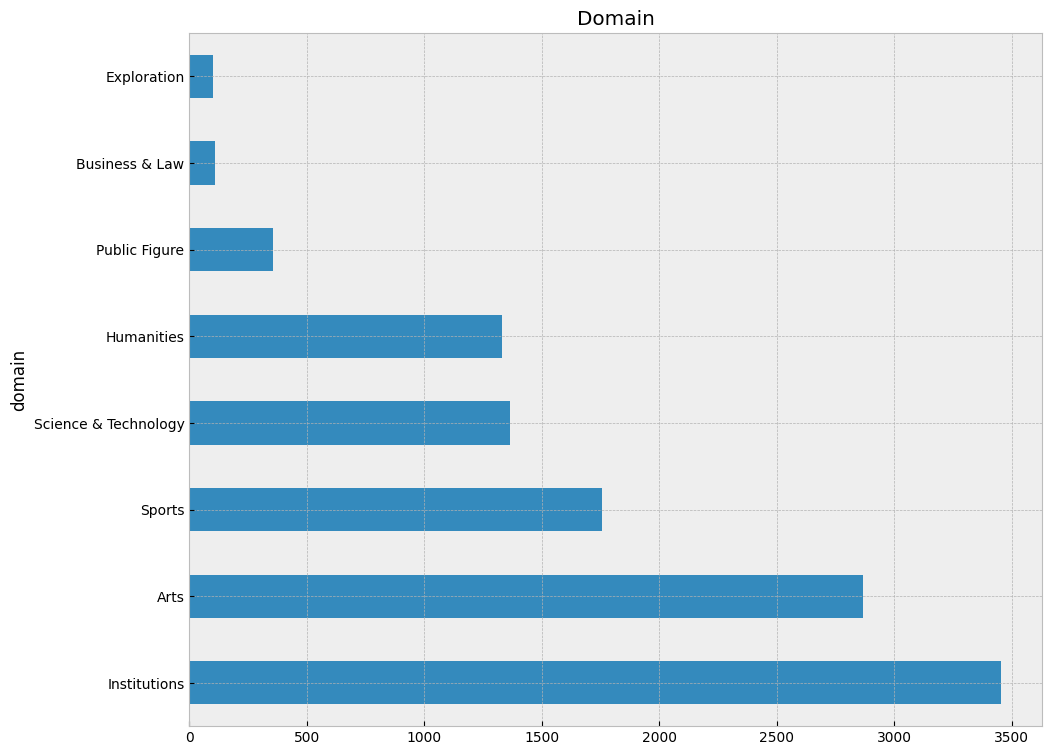

In [26]:
_ = df.domain.value_counts().plot(kind='barh',title='Domain')

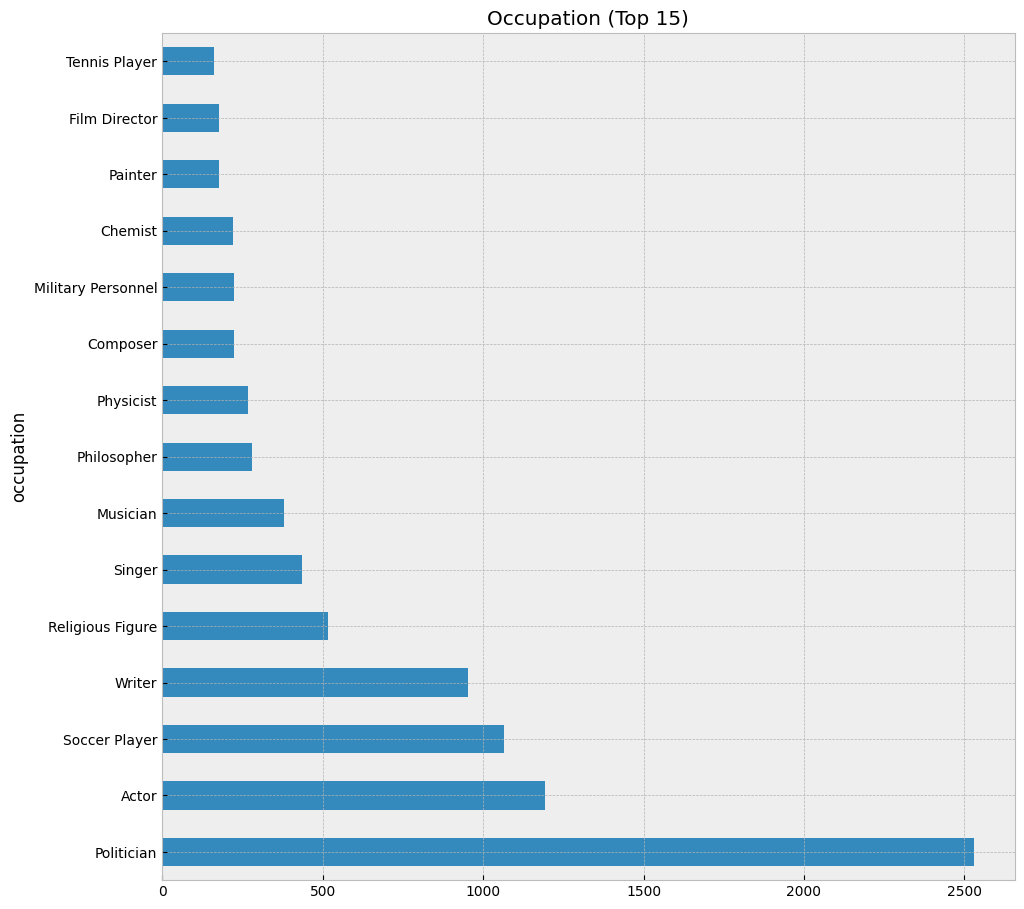

In [27]:
_ = df.occupation.value_counts().nlargest(15).plot.barh(figsize=(11,11),title='Occupation (Top 15)')

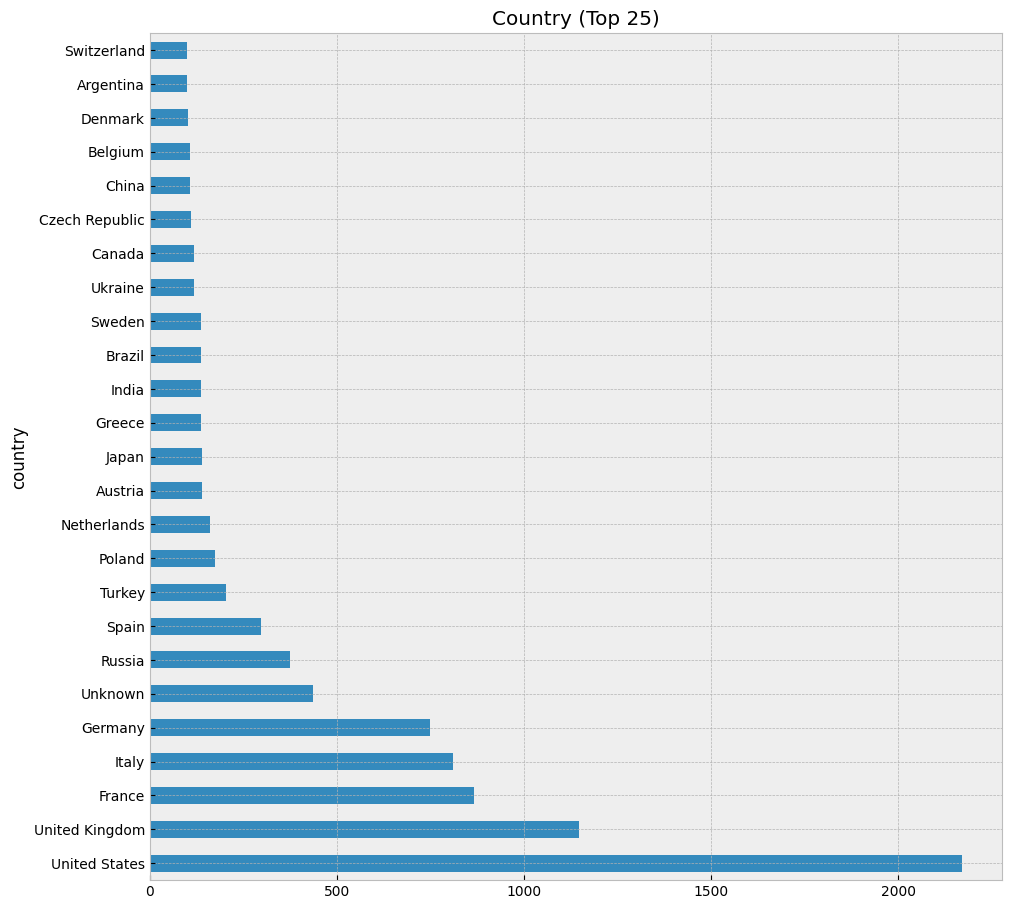

In [28]:
_ = df.country.value_counts().nlargest(25).plot.barh(figsize=(11,11),title='Country (Top 25)')

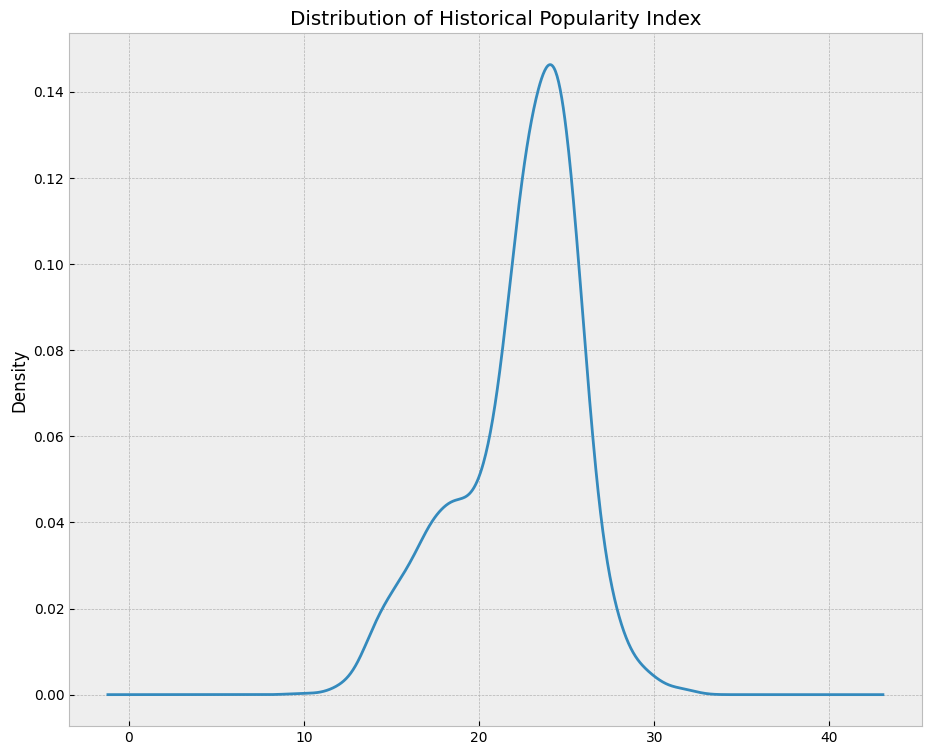

In [29]:
df_sample = df.sample(2000)
_ = df_sample.historical_popularity_index.plot.kde(title='Distribution of Historical Popularity Index')

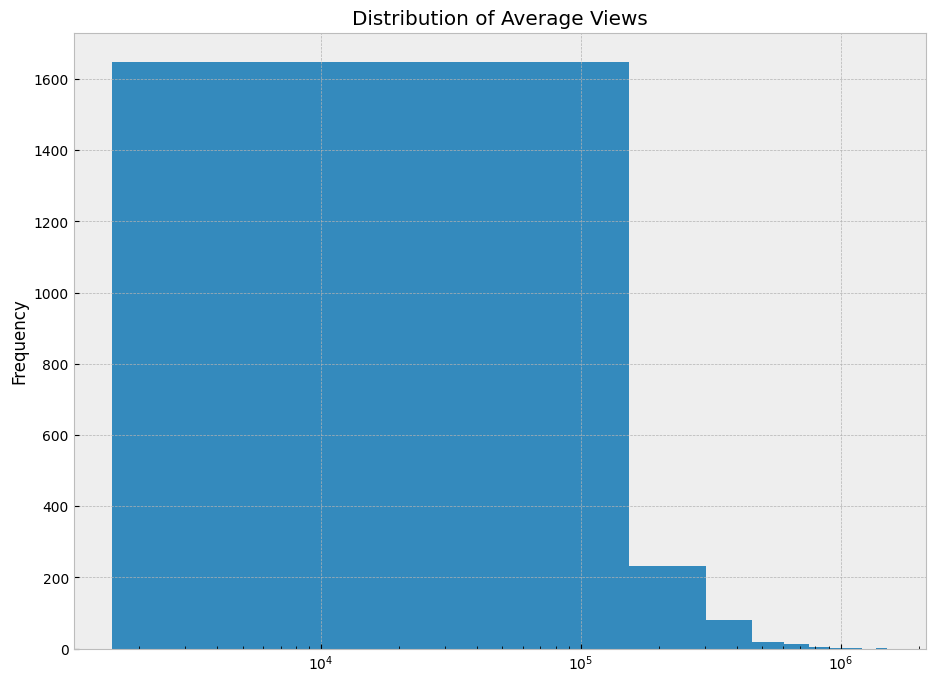

In [30]:
_ = df_sample.average_views.plot.hist(title='Distribution of Average Views',logx=True,figsize=(11,8))

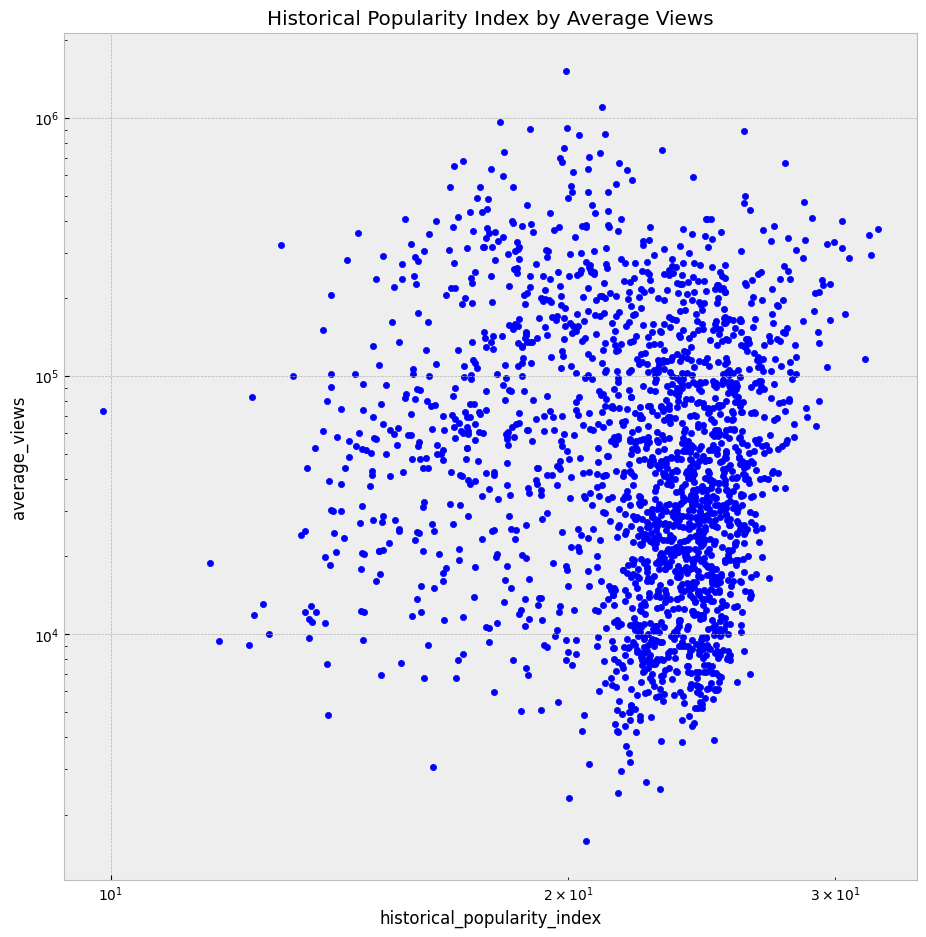

In [31]:
_ = df_sample.plot.scatter('historical_popularity_index','average_views',loglog=True,
                    title='Historical Popularity Index by Average Views',figsize=(11,11))

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-p

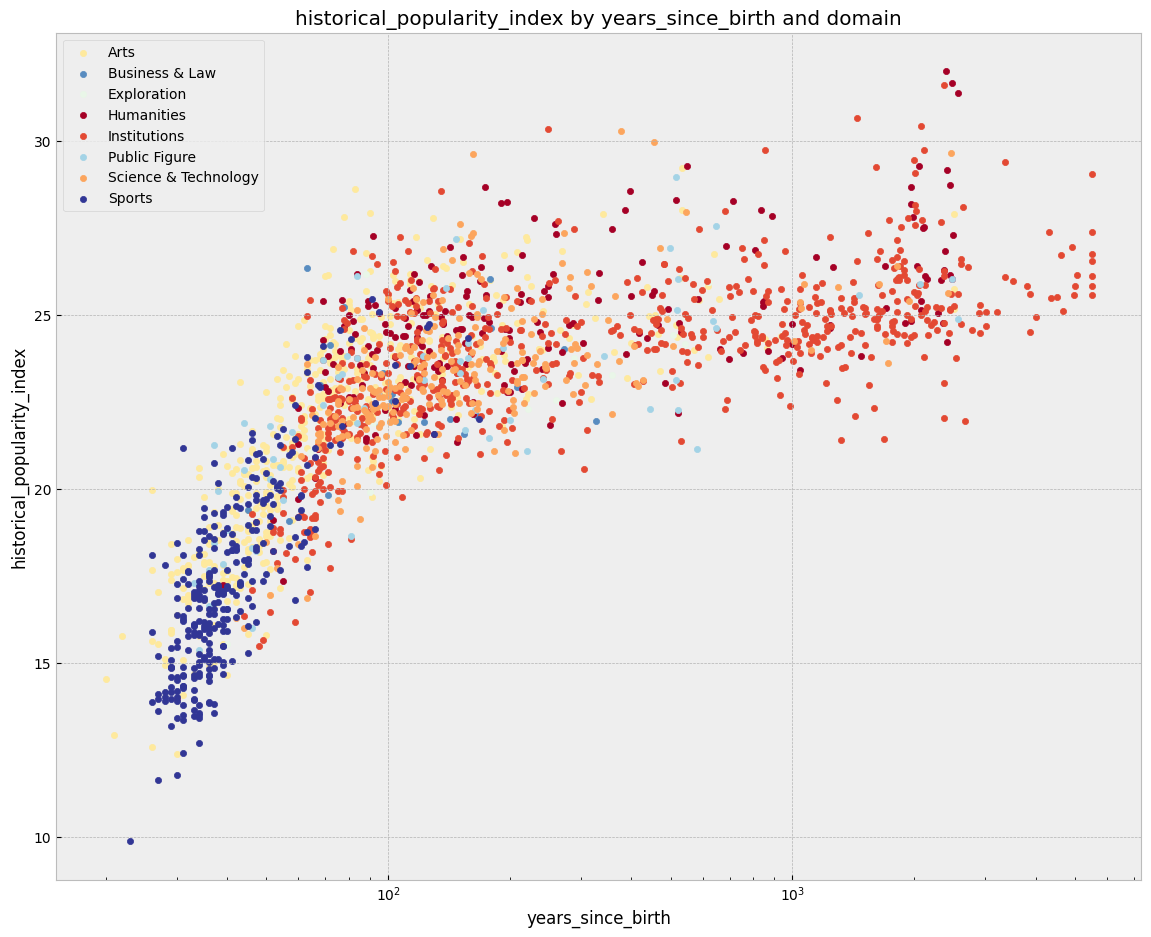

In [32]:
def graph3way(x_col, y_col, hue_col, log='x', fsize=(14,11)):
    if log == '':
        set_logx = False
        set_logy = False
    elif log == 'x':
        set_logx = True
        set_logy = False
    elif log == 'y':
        set_logx = False
        set_logy = True
    else:
        set_logx = True
        set_logy = True
    groups = df[hue_col].unique()
    colors = [cm(i) for i in np.linspace(0.0,1.0,groups.size)]
    _d = {d:colors[i] for i,d in enumerate(groups)}
    fig, ax = plt.subplots(figsize=fsize)
    for d,row in df_sample.groupby(hue_col):
        row.plot.scatter(x=x_col,y=y_col,c=_d[d],logx=set_logx,logy=set_logy,label=d,ax=ax)
    _ = ax.legend()
    _ = ax.set_title('{} by {} and {}'.format(y_col,x_col,hue_col))
                     
graph3way('years_since_birth','historical_popularity_index','domain')

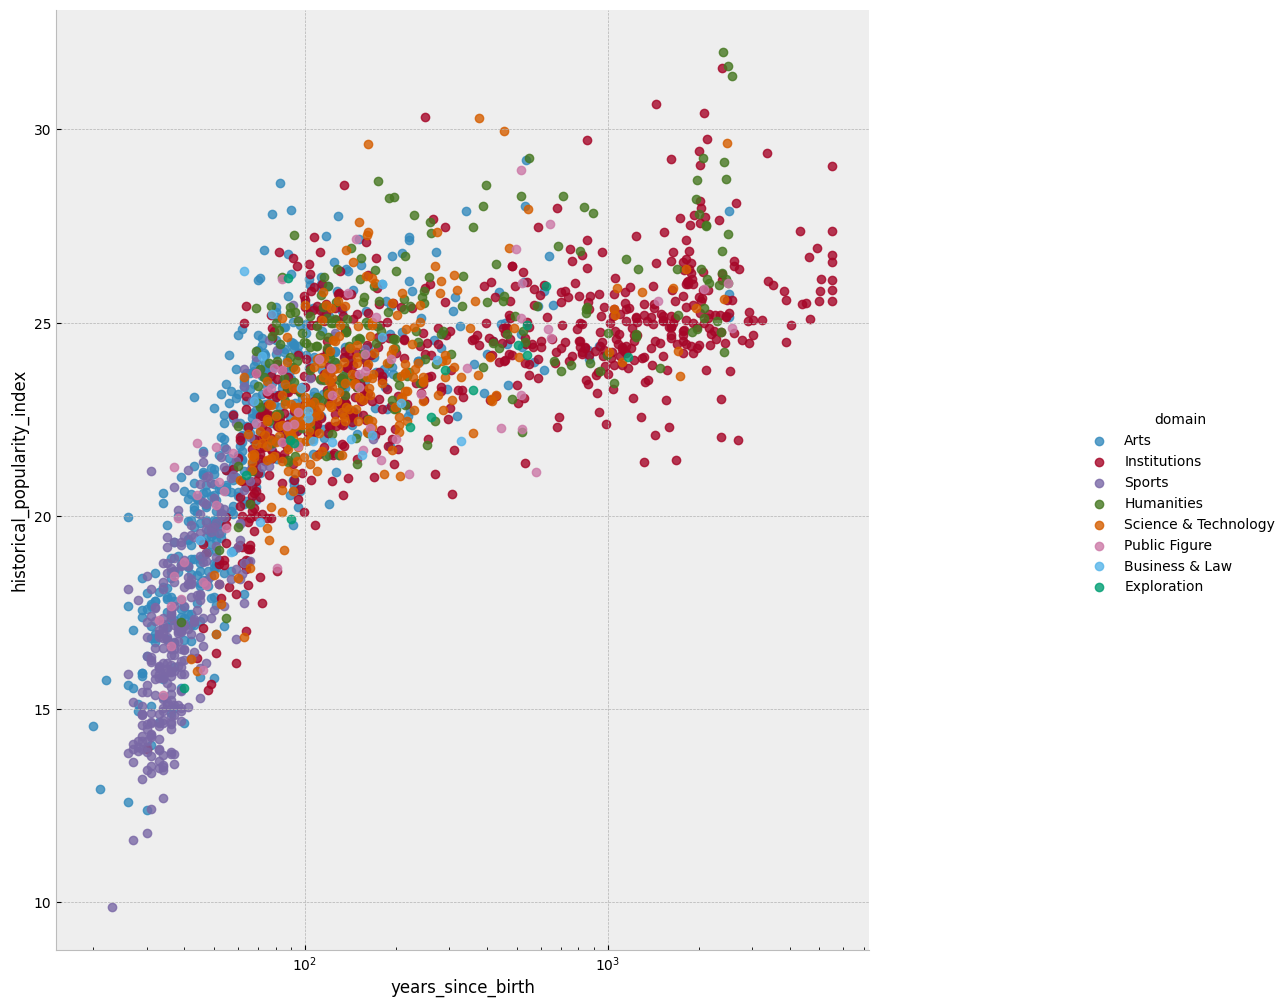

In [33]:
# Alternatively
import seaborn as sns
g = sns.lmplot(x="years_since_birth", y="historical_popularity_index", data=df_sample, fit_reg=False, hue='domain')
g.fig.set_size_inches(14,11)
_ = g.set(xscale="log")

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


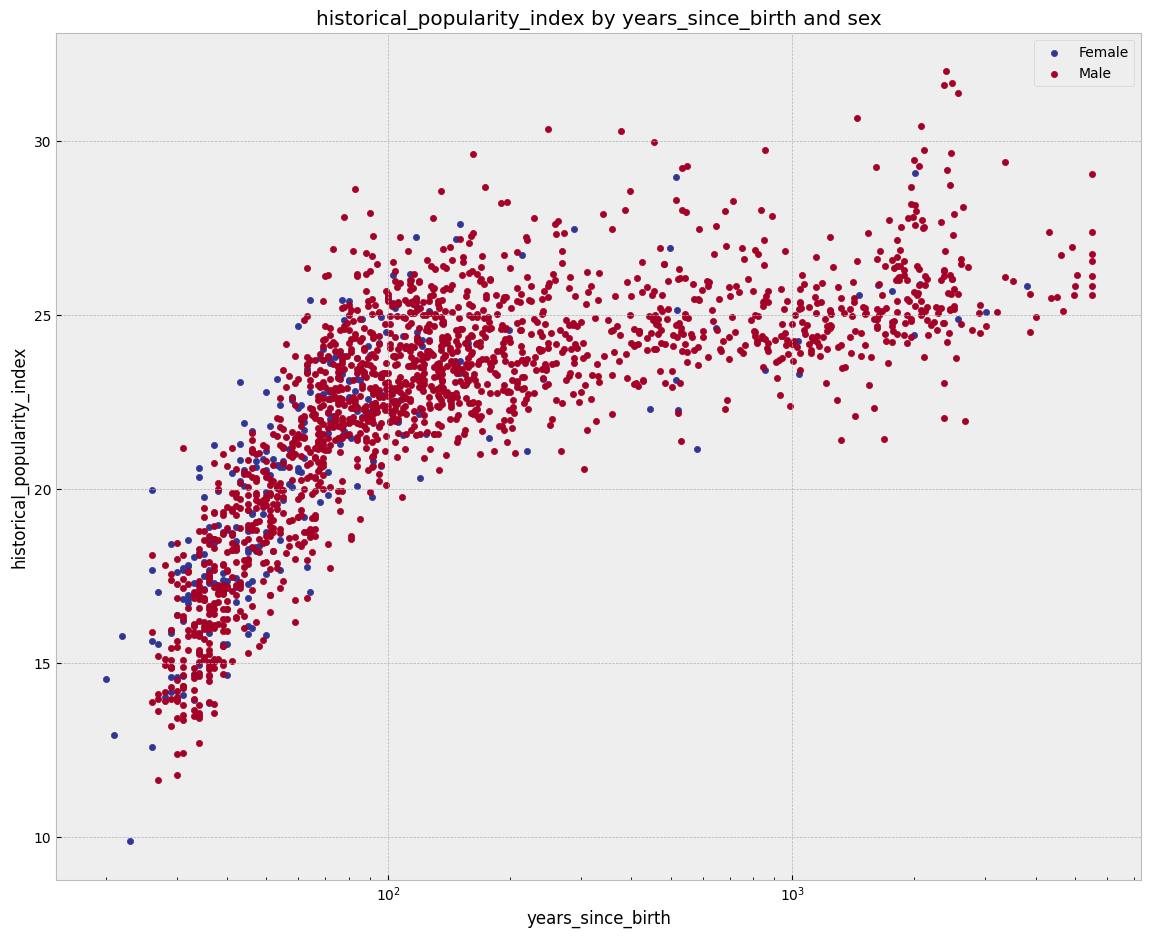

In [34]:
graph3way('years_since_birth','historical_popularity_index','sex')

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-p

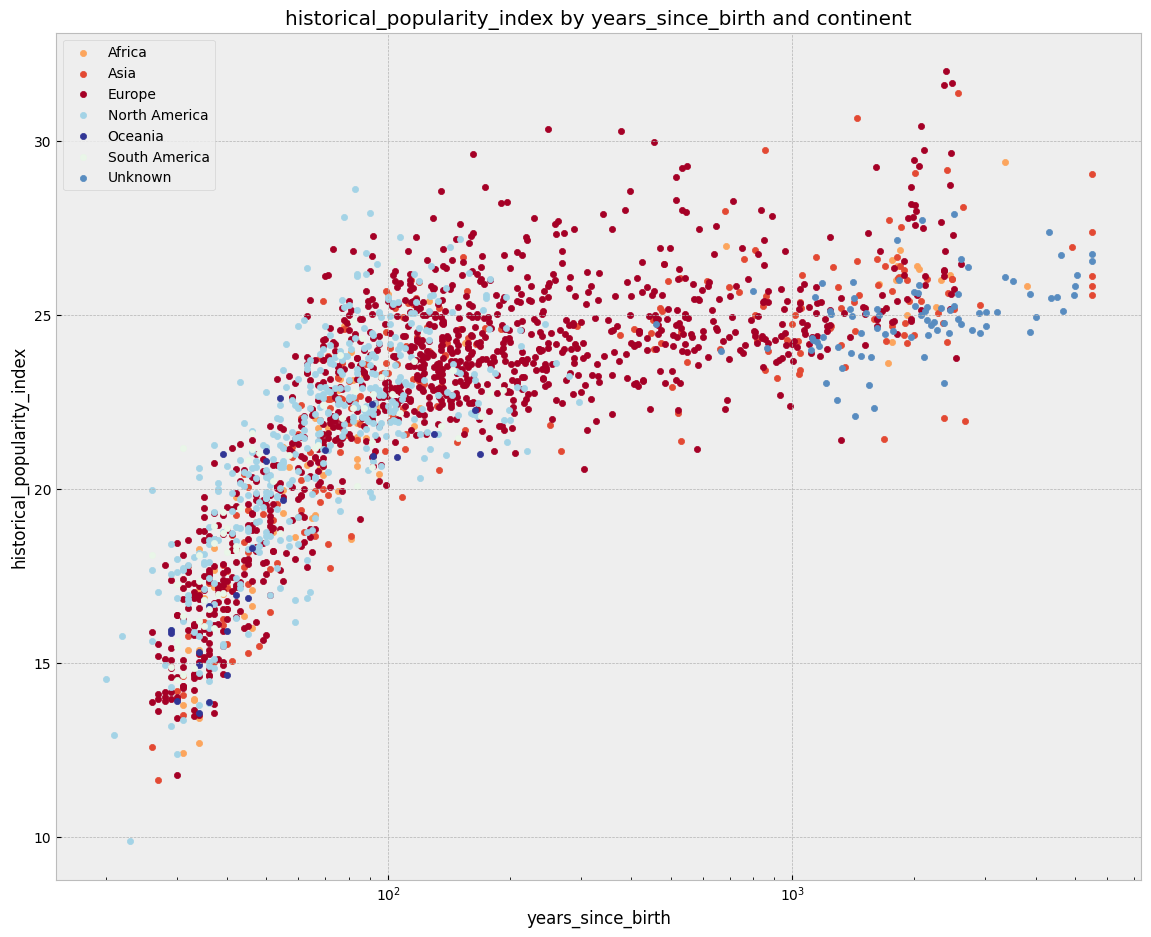

In [35]:
graph3way('years_since_birth','historical_popularity_index','continent')

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-p

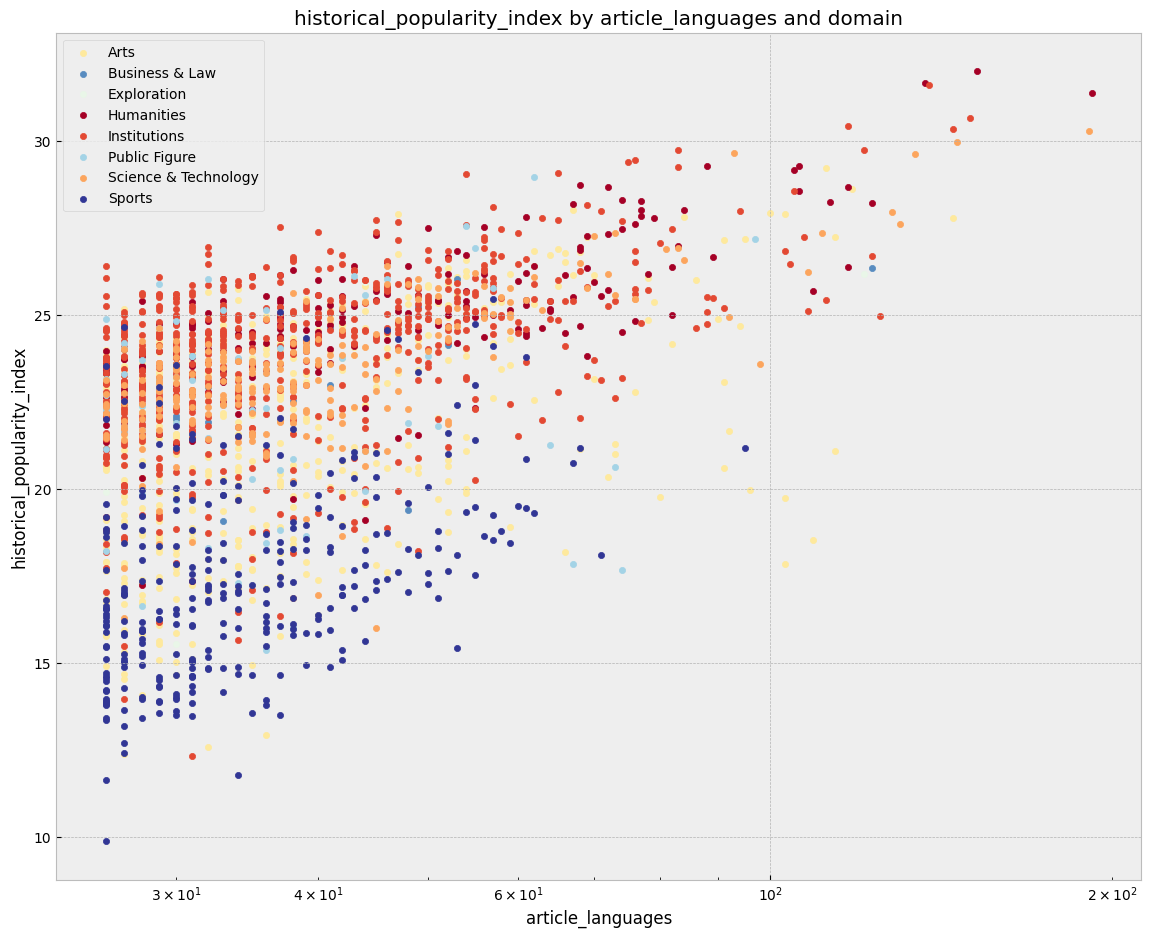

In [36]:
graph3way('article_languages','historical_popularity_index','domain',log='x')

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-p

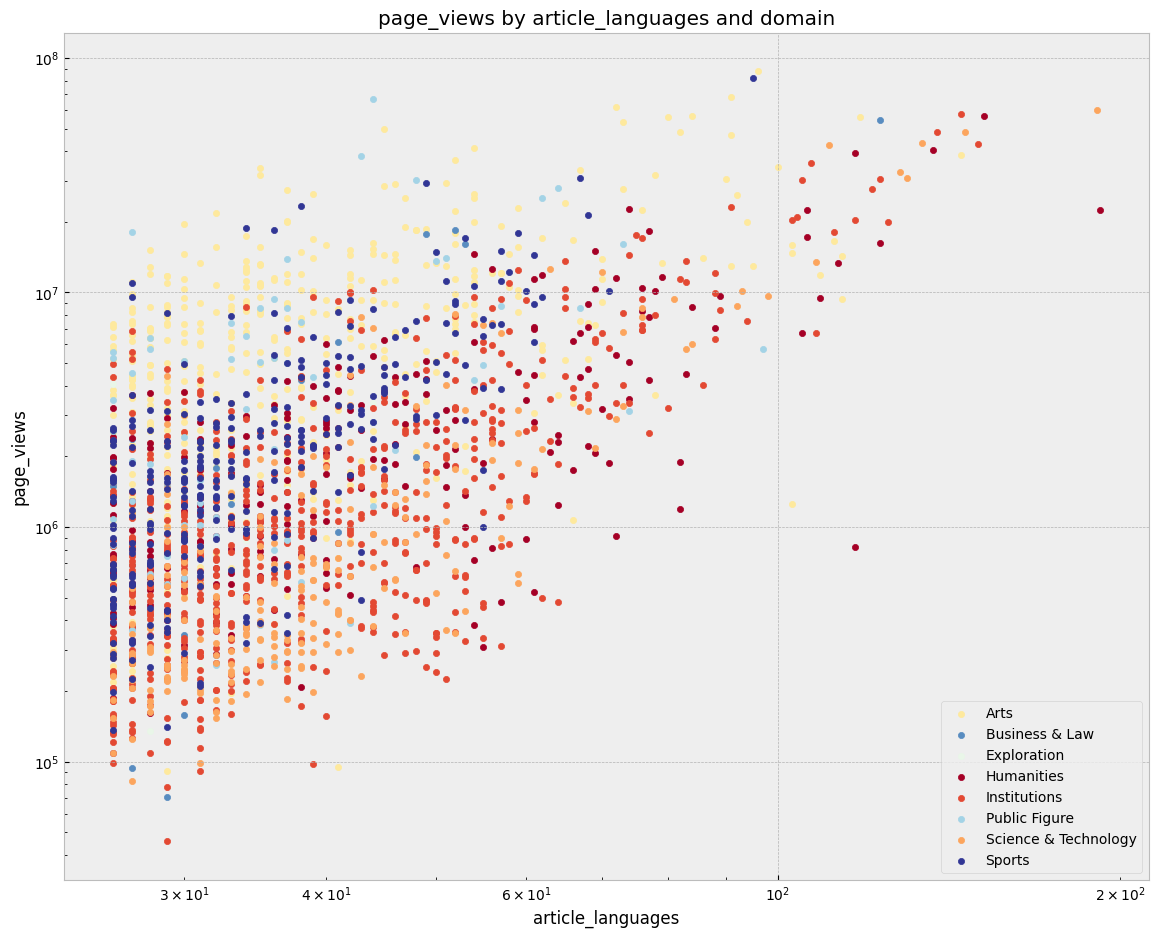

In [37]:
graph3way('article_languages','page_views','domain',log='xy')

# Exploratory Attempt at Predicting "Article Languages"

In [38]:
# creating dummy variables for the columns that were objects
cat_attributes = ['sex','country','continent','occupation','industry','domain']
data_dummies = pd.get_dummies(df[cat_attributes])
#add numerical columns and drop "article_id(column 0)  & city (column 4) & state (column 5)
pan = df.drop(cat_attributes+['city','state','article_id'], axis=1)
pan = pd.concat([pan, data_dummies], axis=1)
pan.set_index('full_name',inplace=True)
pan.head()

,birth_year,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,years_since_birth,sex_Female,sex_Male,...,industry_Social Sciences,industry_Team Sports,domain_Arts,domain_Business & Law,domain_Exploration,domain_Humanities,domain_Institutions,domain_Public Figure,domain_Science & Technology,domain_Sports
full_name,,,,,,,,,,,,,,,,,,,,,
Aristotle,-384,40.33333,23.50000,152,56355172,370758,31.9938,2402.0,False,True,...,False,False,False,False,False,True,False,False,False,False
Plato,-427,37.96667,23.71667,142,46812003,329662,31.9888,2445.0,False,True,...,False,False,False,False,False,True,False,False,False,False
Jesus Christ,-4,32.50000,34.90000,214,60299092,281771,31.8981,2022.0,False,True,...,False,False,False,False,False,False,True,False,False,False
Socrates,-469,37.96667,23.71667,137,40307143,294213,31.6521,2487.0,False,True,...,False,False,False,False,False,True,False,False,False,False
Alexander the Great,-356,40.80000,22.51667,138,48358148,350421,31.5840,2374.0,False,True,...,False,False,False,False,False,False,True,False,False,False


count    11341.000000
mean        40.768892
std         17.467776
min         26.000000
25%         29.000000
50%         35.000000
75%         46.000000
max        214.000000
Name: article_languages, dtype: float64

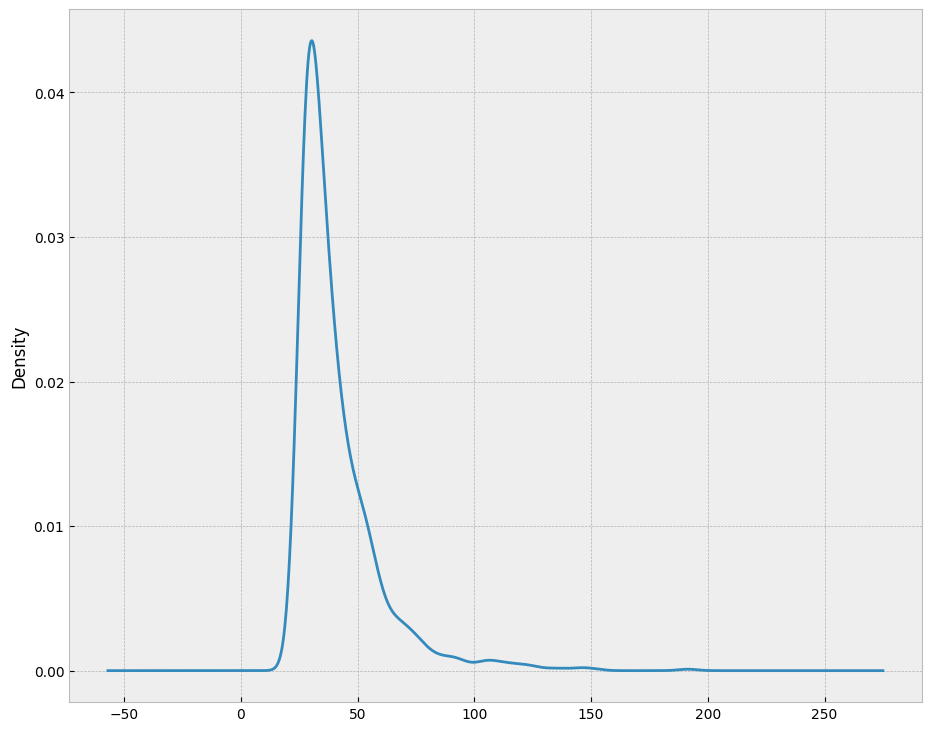

In [39]:
_ = df_sample.article_languages.plot.kde()
df.article_languages.describe()
# Right Skewed Distribution

In [40]:
# ...existing code...
corr_matrix = pan.select_dtypes(include=[np.number]).dropna().corr()
# ...existing code...

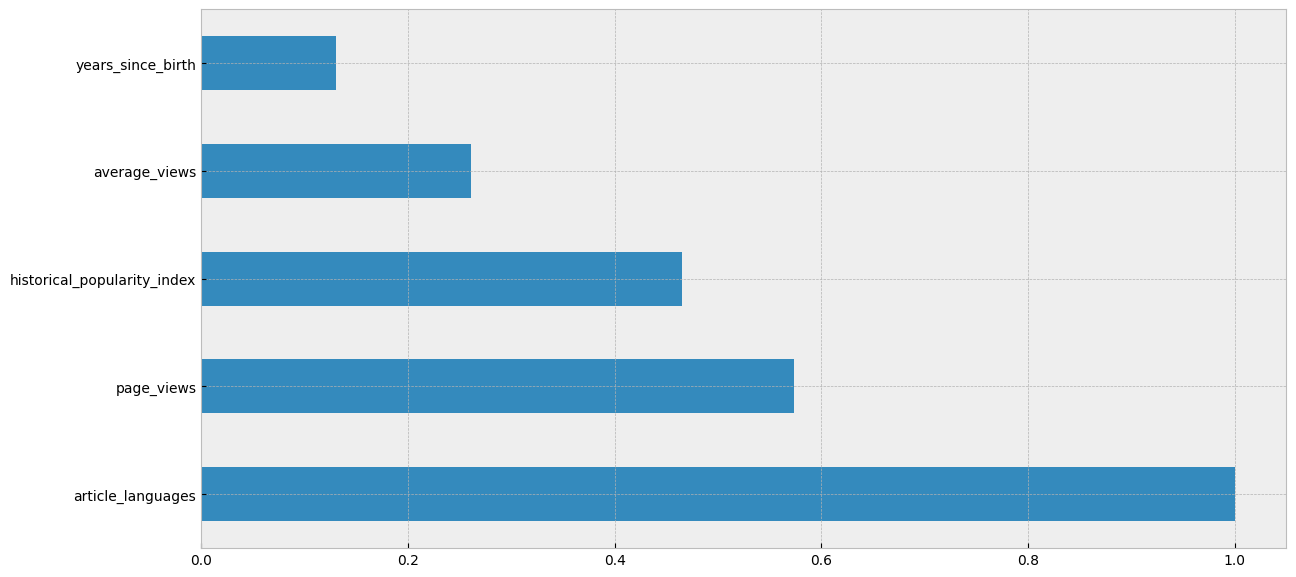

In [41]:
#what columns are correlated to the popularity index
tmp = corr_matrix['article_languages'].sort_values(ascending=False)
_ = tmp[np.abs(tmp) > .1].plot.barh(figsize=(14,7))

In [42]:
def get_fit_summary(X_train,X_test,y_train,y_test,model):
    fmt = '{:7} R**2 = {:.2%}'
    print('\n\n\nModel: {}'.format(model))
    print(fmt.format('Train',model.score(X_train,y_train)))
    print(fmt.format('Test',model.score(X_test,y_test)))


In [43]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso


pan = pan.dropna()
y = pan['article_languages']
X = pan.drop(['article_languages','birth_year','longitude','historical_popularity_index','latitude'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2018)


regr_1 = DecisionTreeRegressor(max_depth=2,min_samples_leaf=.01)
regr_2 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=.01)
regr_ols = LinearRegression()
regr_enet = ElasticNet(alpha = .1)
regr_lasso = Lasso(alpha = .15)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_ols.fit(X_train, y_train)
regr_enet.fit(X_train, y_train)
regr_lasso.fit(X_train, y_train)


y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_ols = regr_ols.predict(X_test)
y_enet = regr_enet.predict(X_test)
y_lasso = regr_lasso.predict(X_test)

In [44]:
print('REGRESSION MODELS')
get_fit_summary(X_train,X_test,y_train,y_test,regr_ols)
get_fit_summary(X_train,X_test,y_train,y_test,regr_enet)
get_fit_summary(X_train,X_test,y_train,y_test,regr_lasso)

REGRESSION MODELS



Model: LinearRegression()
Train   R**2 = 58.55%
Test    R**2 = 51.80%



Model: ElasticNet(alpha=0.1)
Train   R**2 = 55.77%
Test    R**2 = 51.93%



Model: Lasso(alpha=0.15)
Train   R**2 = 55.28%
Test    R**2 = 51.49%


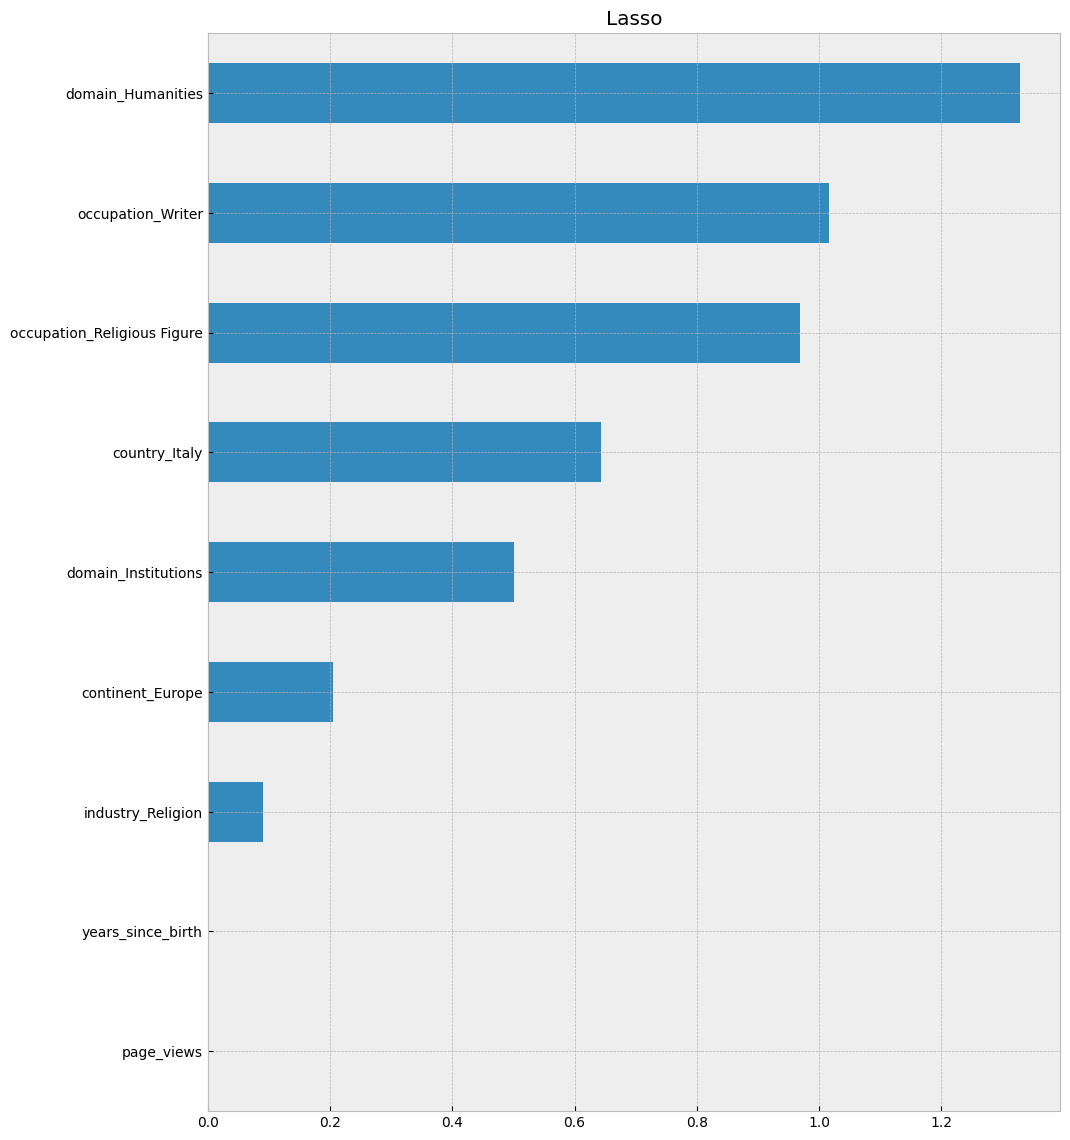

In [45]:
regr_coefficients = pd.DataFrame({'ols':regr_ols.coef_,'enet':regr_enet.coef_,'lasso':regr_lasso.coef_},
                                 index = X.columns)
_ = regr_coefficients[regr_coefficients.lasso > 1e-6]['lasso'].sort_values().plot.barh(title='Lasso',figsize=(11,14))

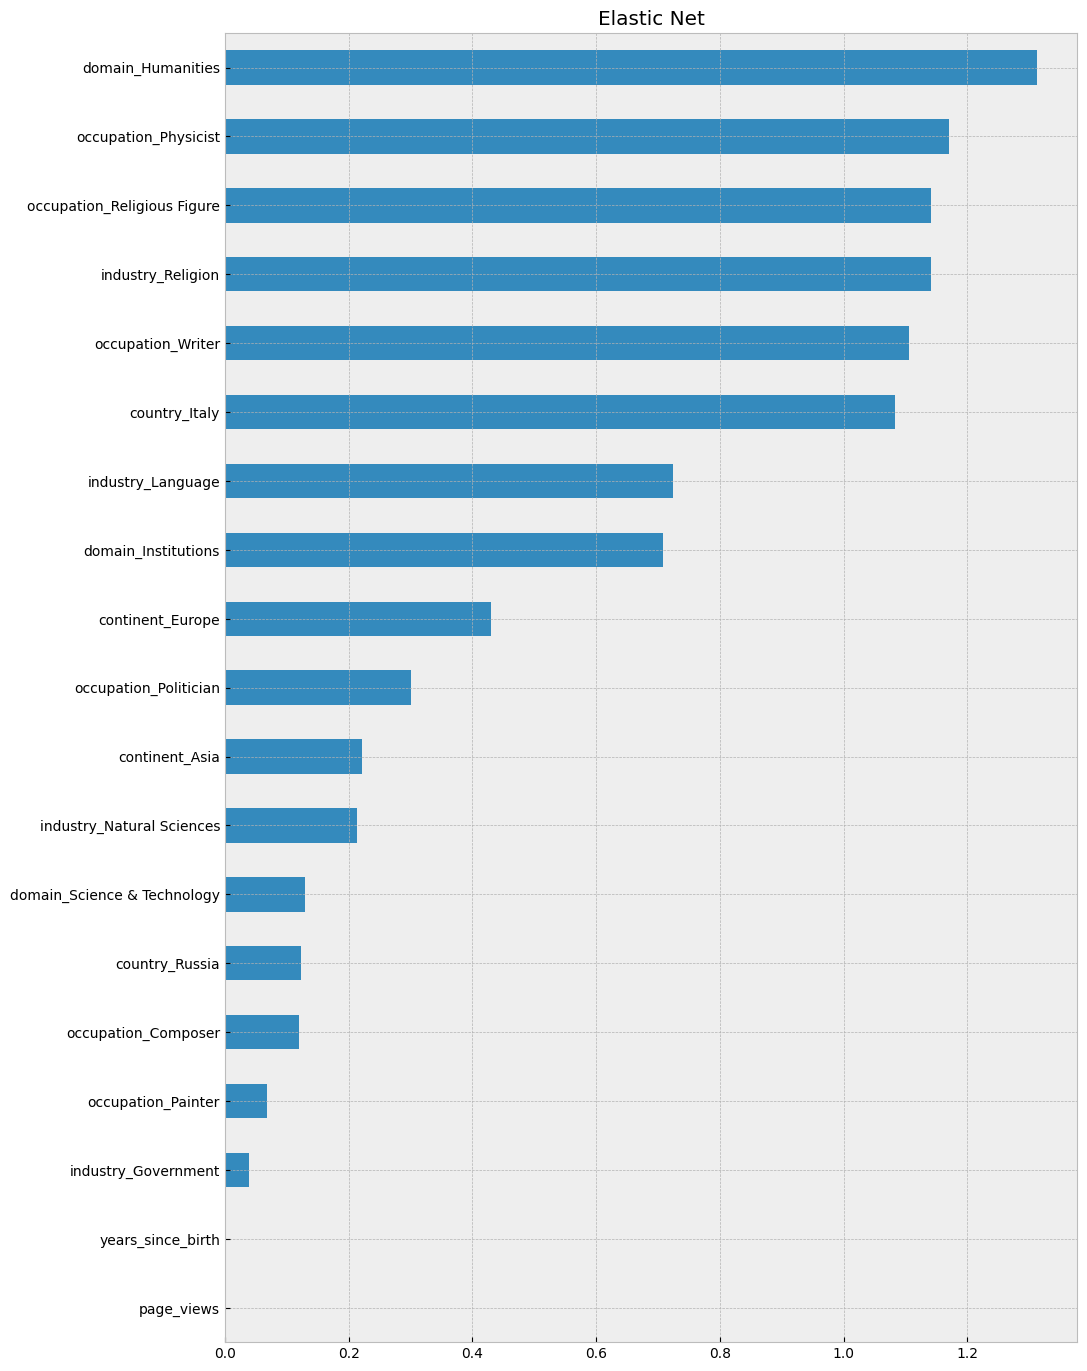

In [46]:
_ = regr_coefficients[regr_coefficients.enet > 1e-6]['enet'].sort_values().plot.barh(title='Elastic Net',figsize=(11,17))

In [47]:
import graphviz 
dot_data = export_graphviz(regr_1, out_file=None, feature_names=X.columns) 
print('R-sq = {:.2%}'.format(metrics.r2_score(y_test,y_1)))
graphviz.Source(dot_data)

R-sq = 34.41%


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [48]:
# Alternative Regression Tree with Bigger Depth
print('R-sq = {:.2%}'.format(metrics.r2_score(y_test,y_2)))
y_2_unique = pd.Series(pd.unique(y_2))
dot_data = export_graphviz(regr_2, out_file=None, feature_names=X.columns) 
graphviz.Source(dot_data)

R-sq = 56.19%


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH